In [1]:
import sys
sys.path.append("../")
from Functions.csv_files.stock import Stock

#Apple Inc.
apple = Stock('AAPL.US', filepath="../Functions/csv_files/")

# JP Morgan Chase
jpm = Stock('JPM.US', filepath="../Functions/csv_files/")

# Exxon Mobil Corporation
xom = Stock('XOM.US', filepath="../Functions/csv_files/")

# Walmart Inc.
walmart = Stock('WMT.US', filepath="../Functions/csv_files/")

In [2]:
apple.retrieve_data().head(7)

,date,close,volume,3 Month Treasury Yield,WTI Crude Oil Prices,7-day volatility,7-day EWM,7-rsi,7-day slope,14-day volatility,14-day EWM,14-rsi,14-day slope
0,1980-12-12,28.7392,469033600,16.55,NaN,NaN,28.739200,NaN,NaN,NaN,28.739200,NaN,NaN
1,1980-12-15,27.2608,175884800,16.77,NaN,NaN,28.369600,NaN,NaN,NaN,28.542080,NaN,NaN
2,1980-12-16,25.2448,105728000,16.70,NaN,NaN,27.588400,NaN,NaN,NaN,28.102443,NaN,NaN
3,1980-12-17,25.8720,86441600,16.47,NaN,NaN,27.159300,NaN,NaN,NaN,27.805050,NaN,NaN
4,1980-12-18,26.6336,73449600,16.20,NaN,NaN,27.027875,NaN,NaN,NaN,27.648857,NaN,NaN
5,1980-12-19,28.2464,48630400,14.93,NaN,NaN,27.332506,NaN,NaN,NaN,27.728529,NaN,NaN
6,1980-12-22,29.6352,37363200,14.84,NaN,25.173614,27.908180,27.376,0.216,NaN,27.982752,NaN,NaN


In [3]:
jpm.retrieve_data().head(5)

,date,close,volume,3 Month Treasury Yield,WTI Crude Oil Prices,7-day volatility,7-day EWM,7-rsi,7-day slope,14-day volatility,14-day EWM,14-rsi,14-day slope
0,1985-01-02,33.6251,162900,7.83,NaN,NaN,33.625100,NaN,NaN,NaN,33.625100,NaN,NaN
1,1985-01-03,34.0001,87300,7.80,NaN,NaN,33.718850,NaN,NaN,NaN,33.675100,NaN,NaN
2,1985-01-04,33.5000,495300,7.82,NaN,NaN,33.664138,NaN,NaN,NaN,33.651753,NaN,NaN
3,1985-01-07,33.1250,301500,7.78,NaN,NaN,33.529353,NaN,NaN,NaN,33.581520,NaN,NaN
4,1985-01-08,33.7500,337800,7.79,NaN,NaN,33.584515,NaN,NaN,NaN,33.603984,NaN,NaN


In [4]:
xom.retrieve_data().head(5)

,date,close,volume,3 Month Treasury Yield,WTI Crude Oil Prices,7-day volatility,7-day EWM,7-rsi,7-day slope,14-day volatility,14-day EWM,14-rsi,14-day slope
0,1985-01-02,22.2500,5212800,7.83,NaN,NaN,22.250000,NaN,NaN,NaN,22.250000,NaN,NaN
1,1985-01-03,22.2500,6864000,7.80,NaN,NaN,22.250000,NaN,NaN,NaN,22.250000,NaN,NaN
2,1985-01-04,22.1250,4941600,7.82,NaN,NaN,22.218750,NaN,NaN,NaN,22.233333,NaN,NaN
3,1985-01-07,22.3126,8364800,7.78,NaN,NaN,22.242213,NaN,NaN,NaN,22.243902,NaN,NaN
4,1985-01-08,22.3126,5036800,7.79,NaN,NaN,22.259809,NaN,NaN,NaN,22.253062,NaN,NaN


In [5]:
walmart.retrieve_data().head(5)

,date,close,volume,3 Month Treasury Yield,WTI Crude Oil Prices,7-day volatility,7-day EWM,7-rsi,7-day slope,14-day volatility,14-day EWM,14-rsi,14-day slope
0,1985-01-02,38.3744,7184000,7.83,NaN,NaN,38.37440,NaN,NaN,NaN,38.374400,NaN,NaN
1,1985-01-03,38.3744,7033600,7.80,NaN,NaN,38.37440,NaN,NaN,NaN,38.374400,NaN,NaN
2,1985-01-04,38.4992,5913600,7.82,NaN,NaN,38.40560,NaN,NaN,NaN,38.391040,NaN,NaN
3,1985-01-07,39.3760,4416000,7.78,NaN,NaN,38.64820,NaN,NaN,NaN,38.522368,NaN,NaN
4,1985-01-08,39.5008,6060800,7.79,NaN,NaN,38.86135,NaN,NaN,NaN,38.652826,NaN,NaN


In [69]:
def split(dataframe, window, columns = None, test_split = False):
  X = []
  y_raw = []
  y_label = []
  if columns is not None:
    dataframe = dataframe[columns]
  dataframe = dataframe.dropna()
  # retaining the date is important for later on
  dataframe = dataframe.set_index('date')
  L = len(dataframe)
  
  for i in range(0, L):
    if i > (L - window - 1):
      break
    X.append(dataframe[i:(i + window)])
    label = dataframe['close'][i + window]
    last = dataframe['close'][i + window - 1]
    y_raw.append(label)
    if label <= last:
      y_label.append(0)
    else:
      y_label.append(1)
  return X, y_raw, y_label

In [70]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import keras
import lstm_utils
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [71]:
columns = ['date', 'close', '3 Month Treasury Yield', 'WTI Crude Oil Prices', '7-day volatility']
timesteps = 7

In [84]:
raw_apple_X, raw_apple_y, _ = split(apple.data[columns], timesteps)
raw_jpm_X, raw_jpm_y, _ = split(jpm.data[columns], timesteps)
raw_xom_X, raw_xom_y, _ = split(xom.data[columns], timesteps)
raw_walmart_X, raw_walmart_y, _ = split(walmart.data[columns], timesteps)

In [85]:
apple_X = np.array(raw_apple_X)
apple_X = apple_X.astype('float32')
apple_y = np.array(raw_apple_y)

jpm_X = np.array(raw_jpm_X)
jpm_X = jpm_X.astype('float32')
jpm_y = np.array(raw_jpm_y)

xom_X = np.array(raw_xom_X)
xom_X = xom_X.astype('float32')
xom_y = np.array(raw_xom_y)

walmart_X = np.array(raw_walmart_X)
walmart_X = walmart_X.astype('float32')
walmart_y = np.array(raw_walmart_y)

In [74]:
print(apple_X.shape)
print(jpm_X.shape)
print(xom_X.shape)
print(walmart_X.shape)

(9207, 7, 4)
(9227, 7, 4)
(9227, 7, 4)
(9227, 7, 4)


In [12]:
def summarize_results(model, data, y = None):
  predicted = model.predict(data)
  if y is not None:
    actual = y.reshape(-1, 1)
    plt.plot(actual, label = 'actual', color='red')
  plt.plot(predicted, label = 'predicted', color = 'green')
  plt.show()
  return predicted

In [30]:
def create_model(no_timesteps, no_features):
  model = keras.Sequential()
  model.add(LSTM(20, return_sequences=True, input_shape=(no_timesteps, no_features)))
  model.add(Dropout(0.2))
  model.add(LSTM(10, return_sequences=False, input_shape=(no_timesteps, no_features)))
  model.add(Dense(25))
  model.add(Dense(1))
  return model

In [51]:
apple_model = create_model(7, apple_X.shape[2])
jpm_model = create_model(7, jpm_X.shape[2])
xom_model = create_model(7, xom_X.shape[2])
walmart_model = create_model(7, walmart_X.shape[2])

In [52]:
learning_rate = 0.001

apple_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
jpm_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
xom_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
walmart_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

In [53]:
apple_es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
apple_model_history = apple_model.fit(apple_X, apple_y, epochs=20, batch_size=32, validation_split=0.25, callbacks=[apple_es_callback])

Epoch 1/20
216/216 [==============================] - 7s 16ms/step - loss: 25799.4590 - val_loss: 35526.6133
Epoch 2/20
216/216 [==============================] - 3s 12ms/step - loss: 18434.4688 - val_loss: 19603.3770
Epoch 3/20
216/216 [==============================] - 3s 12ms/step - loss: 11088.5527 - val_loss: 11708.1475
Epoch 4/20
216/216 [==============================] - 3s 12ms/step - loss: 5804.2554 - val_loss: 5388.4517
Epoch 5/20
216/216 [==============================] - 3s 12ms/step - loss: 2905.3057 - val_loss: 3845.5151
Epoch 6/20
216/216 [==============================] - 2s 11ms/step - loss: 1517.0814 - val_loss: 2604.6033
Epoch 7/20
216/216 [==============================] - 2s 11ms/step - loss: 888.3575 - val_loss: 2742.9695
Epoch 8/20
216/216 [==============================] - 2s 12ms/step - loss: 645.0309 - val_loss: 3144.7417
Epoch 9/20
216/216 [==============================] - 2s 11ms/step - loss: 436.0950 - val_loss: 3017.4971
Epoch 10/20
216/216 [=============

288/288 [==============================] - 2s 4ms/step


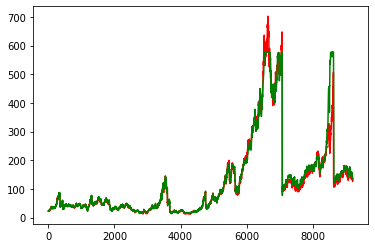

array([[ 22.262281],
       [ 22.44681 ],
       [ 22.617638],
       ...,
       [136.9039  ],
       [135.9059  ],
       [136.83426 ]], dtype=float32)

In [54]:
summarize_results(apple_model, apple_X, apple_y)

In [55]:
jpm_es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
jpm_model_history = jpm_model.fit(jpm_X, jpm_y, epochs=20, batch_size=32, validation_split=0.25, callbacks=[jpm_es_callback])

Epoch 1/20
217/217 [==============================] - 7s 15ms/step - loss: 1383.3042 - val_loss: 4739.5088
Epoch 2/20
217/217 [==============================] - 2s 11ms/step - loss: 439.6914 - val_loss: 3373.3745
Epoch 3/20
217/217 [==============================] - 2s 11ms/step - loss: 155.1188 - val_loss: 1628.6985
Epoch 4/20
217/217 [==============================] - 2s 11ms/step - loss: 58.4968 - val_loss: 1074.6302
Epoch 5/20
217/217 [==============================] - 2s 11ms/step - loss: 31.4770 - val_loss: 802.8717
Epoch 6/20
217/217 [==============================] - 2s 11ms/step - loss: 21.2062 - val_loss: 778.7168
Epoch 7/20
217/217 [==============================] - 2s 11ms/step - loss: 15.6857 - val_loss: 735.9053
Epoch 8/20
217/217 [==============================] - 2s 11ms/step - loss: 12.6703 - val_loss: 857.6627
Epoch 9/20
217/217 [==============================] - 2s 11ms/step - loss: 11.6439 - val_loss: 836.5571
Epoch 10/20
217/217 [==============================] - 3

289/289 [==============================] - 2s 4ms/step


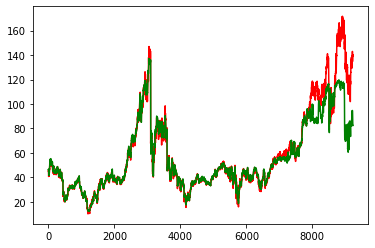

array([[46.334   ],
       [46.16511 ],
       [46.242104],
       ...,
       [83.156265],
       [82.24794 ],
       [82.47412 ]], dtype=float32)

In [56]:
summarize_results(jpm_model, jpm_X, jpm_y)


In [57]:
xom_es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
xom_model_history = xom_model.fit(xom_X, xom_y, epochs=20, batch_size=32, validation_split=0.25, callbacks=[xom_es_callback])

Epoch 1/20
217/217 [==============================] - 8s 15ms/step - loss: 2530.7310 - val_loss: 1561.4819
Epoch 2/20
217/217 [==============================] - 2s 11ms/step - loss: 405.7635 - val_loss: 529.7936
Epoch 3/20
217/217 [==============================] - 2s 11ms/step - loss: 258.3872 - val_loss: 284.7937
Epoch 4/20
217/217 [==============================] - 2s 11ms/step - loss: 50.7249 - val_loss: 86.5307
Epoch 5/20
217/217 [==============================] - 2s 11ms/step - loss: 18.5355 - val_loss: 49.9285
Epoch 6/20
217/217 [==============================] - 2s 11ms/step - loss: 14.2148 - val_loss: 32.6878
Epoch 7/20
217/217 [==============================] - 2s 11ms/step - loss: 10.9897 - val_loss: 30.3878
Epoch 8/20
217/217 [==============================] - 2s 11ms/step - loss: 10.0853 - val_loss: 22.8160
Epoch 9/20
217/217 [==============================] - 3s 12ms/step - loss: 8.7970 - val_loss: 19.4412
Epoch 10/20
217/217 [==============================] - 3s 12ms/ste

289/289 [==============================] - 2s 4ms/step


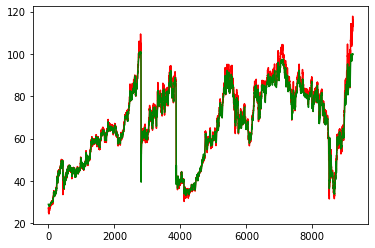

array([[ 28.915403],
       [ 28.906174],
       [ 28.91502 ],
       ...,
       [100.085526],
       [100.0884  ],
       [ 99.99981 ]], dtype=float32)

In [58]:
summarize_results(xom_model, xom_X, xom_y)

In [61]:
walmart_es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
walmart_model_history = walmart_model.fit(walmart_X, walmart_y, epochs=20, batch_size=32, validation_split=0.25, callbacks=[walmart_es_callback])

Epoch 1/20
217/217 [==============================] - 3s 12ms/step - loss: 3.9845 - val_loss: 924.7165
Epoch 2/20
217/217 [==============================] - 2s 11ms/step - loss: 3.9899 - val_loss: 903.3375
Epoch 3/20
217/217 [==============================] - 2s 11ms/step - loss: 3.7821 - val_loss: 831.8083
Epoch 4/20
217/217 [==============================] - 2s 11ms/step - loss: 3.7584 - val_loss: 861.6869
Epoch 5/20
217/217 [==============================] - 3s 12ms/step - loss: 3.4844 - val_loss: 941.1629
Epoch 6/20
217/217 [==============================] - 2s 11ms/step - loss: 3.5981 - val_loss: 944.5809
Epoch 7/20
217/217 [==============================] - 2s 11ms/step - loss: 3.4318 - val_loss: 780.0649
Epoch 8/20
217/217 [==============================] - 2s 11ms/step - loss: 3.6455 - val_loss: 853.4057
Epoch 9/20
217/217 [==============================] - 2s 11ms/step - loss: 3.5072 - val_loss: 832.7245
Epoch 10/20
217/217 [==============================] - 2s 11ms/step - los

289/289 [==============================] - 1s 4ms/step


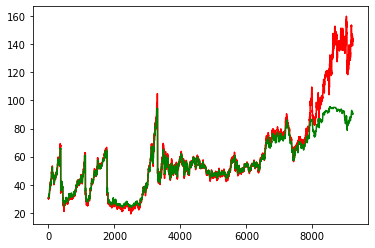

array([[30.81239 ],
       [30.928473],
       [30.85776 ],
       ...,
       [90.04938 ],
       [90.264565],
       [90.62898 ]], dtype=float32)

In [62]:
summarize_results(walmart_model, walmart_X, walmart_y)

<h1> Testing the Explainer </h1>

In [138]:
from XAI.explainer import Explainer, flatten
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

In [108]:
def search(lst, labels, target_date):
  for index, item in enumerate(lst):
    if target_date == str(item.index[-1]):
      return item, labels[index]
  return None, None

<h2>Scenario 1</h2>
Date: 11 September 2001

Event: September 11 Attacks

What happened: 
- Before the attack, oil was at low. The price of oil suddenly peaked to a high on the day of the attack. 
- The stock market suffered a huge loss in value. 

What we expect to observe:
- The explainer should be able to point out the sudden rise in price as an explaination. 

In [134]:
apple_explainer_1 = Explainer(apple_model, np.array(a), surrogate_model=DecisionTreeRegressor(max_depth=5))

In [135]:
apple_explainer_1.generate_neigbouring_datapoints()

In [136]:
apple_explainer_1.explain(pipeline=[flatten])

2/2 [==============================] - 0s 7ms/step


In [140]:
feature_importance = pd.DataFrame(apple_explainer_1.surrogate_model.feature_importances_)

In [144]:
def assign_feature_names(feature_importance, features):
  cols = []
  for i in range(0, 7):
    for j in features:
      cols.append(j + "_" + str(i))
  feature_importance.index = cols
  
assign_feature_names(feature_importance, columns[1:])

feature_importance.sort_values(by=0, ascending=False).head(10)

,0
WTI Crude Oil Prices_2,0.457819
WTI Crude Oil Prices_4,0.251828
close_6,0.179296
close_3,0.060732
WTI Crude Oil Prices_3,0.028388
close_2,0.018170
WTI Crude Oil Prices_6,0.001572
WTI Crude Oil Prices_1,0.001271
close_4,0.000924
3 Month Treasury Yield_6,0.000000


In [128]:
a, b = search(raw_apple_X, raw_apple_y, '2008-03-10')
print(a)

               close  3 Month Treasury Yield  WTI Crude Oil Prices  \
date                                                                 
2008-02-29  125.0200                    1.81                101.78   
2008-03-03  121.7300                    1.67                102.42   
2008-03-04  124.6196                    1.63                 99.72   
2008-03-05  124.4908                    1.50                104.45   
2008-03-06  120.9292                    1.37                105.51   
2008-03-07  122.2508                    1.42                105.12   
2008-03-10  119.6888                    1.33                107.90   

            7-day volatility  
date                          
2008-02-29         61.633826  
2008-03-03         61.514551  
2008-03-04         58.272185  
2008-03-05         52.778884  
2008-03-06         46.666987  
2008-03-07         47.664431  
2008-03-10         32.800360  


In [114]:
a